In [1]:
# pip install hazm

In [2]:
# pip install parsivar

In [3]:
#pip install stopwords_guilannlp

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from parsivar import Normalizer
from parsivar import FindStems
import string
from nltk.corpus import stopwords
import re
from string import punctuation
import re
import matplotlib.pyplot as plt
from hazm import *
from stopwords_guilannlp import *
from os import path
import collections, os
import sys
import regex

Reading files :

In [5]:
import glob
import os
file_train_ok = glob.glob(os.path.join(os.getcwd(), "hamtraining", "*.txt"))
train_ok_list = []
for file_path in file_train_ok:
    with open(file_path) as f_input:
        train_ok_list.append(f_input.read())
train_ok = pd.DataFrame(train_ok_list) 
train_ok.head()

,0
0,﻿با سلام و احترام\nبدینوسیله پیرو نامه شماره ت...
1,﻿«لا یحب الله جهربالسوء من القول الا من ظلم»\n...
2,﻿سلام، در مورد این که آموزش و پرورش مدرک آزفا ...
3,﻿سلام چه خوبه که شما احساس مسئولیت دارین و جوا...
4,﻿سلام من مترجمی زبان انگلیسی خوندم البته نه سا...


In [6]:
# ok = ham
spam_training_path =  '/home/nikta/Desktop/emails/spamtraining'
ok_training_path  =  '/home/nikta/Desktop/emails/hamtraining'
spam_test_path =  '/home/nikta/Desktop/emails/spamtesting'
ok_test_path  =  '/home/nikta/Desktop/emails/hamtesting'

train_spam_file = os.listdir(spam_training_path)
train_ok_file = os.listdir(ok_training_path)
test_spam_file = os.listdir(spam_test_path)
test_ok_file = os.listdir(ok_test_path)

Preprocess :

In [7]:
normalizer = Normalizer()
stemmer = FindStems()
stopWords =["==",":",":",'*',"*","*","/",":","(","=","%","<",">","1","2","3","4","5","6","7","8","9","0","!",",",".",":",";","،","؛","؟","آباد","آره","آری","آمد","آمده","آن","آنان","آنجا","آنطور","آنقدر","آنكه","آنها","آنچه","آنکه","آورد","آورده","آيد","آی","آیا","آیند","اتفاقا","اثرِ","احتراما","احتمالا","اخیر","اری","از","ازجمله","اساسا","است","استفاد","استفاده","اش","اشکارا","اصلا","اصولا","اعلام","اغلب","اكنون","الان","البته","البتّه","ام","اما","امروز","امروزه","امسال","امشب","امور","ان","انجام","اند","انشاالله","انصافا","انطور","انقدر","انها","انچنان","انکه","انگار","او","اول","اولا","اي","ايشان","ايم","اين","اينكه","اکثرا","اکنون","اگر","ای","ایا","اید","ایشان","ایم","این","اینجا","ایند","اینطور","اینقدر","اینها","اینچنین","اینک","اینکه","اینگونه","با","بار","بارة","باره","بارها","باز","بازهم","باش","باشد","باشم","باشند","باشيم","باشی","باشید","باشیم","بالا","بالاخره","بالایِ","بالطبع","بايد","باید","بتوان","بتواند","بتوانی","بتوانیم","بخش","بخشی","بخواه","بخواهد","بخواهم","بخواهند","بخواهی","بخواهید","بخواهیم","بد","بدون","بر","برابر","برابرِ","براحتی","براساس","براستی","براي","برای","برایِ","برخوردار","برخي","برخی","برداري","برعکس","بروز","بزرگ","بزودی","بسا","بسيار","بسياري","بسیار","بسیاری","بطور","بعد","بعدا","بعدها","بعری","بعضا","بعضي","بلافاصله","بلكه","بله","بلکه","بلی","بنابراين","بنابراین","بندي","به","بهتر","بهترين","بود","بودم","بودن","بودند","بوده","بودی","بودید","بودیم","بویژه","بي","بيست","بيش","بيشتر","بيشتري","بين","بکن","بکند","بکنم","بکنند","بکنی","بکنید","بکنیم","بگو","بگوید","بگویم","بگویند","بگویی","بگویید","بگوییم","بگیر","بگیرد","بگیرم","بگیرند","بگیری","بگیرید","بگیریم","بی","بیا","بیاب","بیابد","بیابم","بیابند","بیابی","بیابید","بیابیم","بیاور","بیاورد","بیاورم","بیاورند","بیاوری","بیاورید","بیاوریم","بیاید","بیایم","بیایند","بیایی","بیایید","بیاییم","بیرون","بیرونِ","بیش","بیشتر","بیشتری","بین","ت","تا","تازه","تاكنون","تان","تاکنون","تحت","تر","تر  براساس","ترين","تقریبا","تلویحا","تمام","تماما","تمامي","تنها","تو","تواند","توانست","توانستم","توانستن","توانستند","توانسته","توانستی","توانستیم","توانم","توانند","توانی","توانید","توانیم","توسط","تولِ","تویِ","ثانیا","جا","جاي","جايي","جای","جدا","جديد","جدید","جريان","جریان","جز","جلوگيري","جلویِ","جمعا","جناح","جهت","حاضر","حال","حالا","حتما","حتي","حتی","حداکثر","حدودا","حدودِ","حق","خارجِ","خب","خدمات","خصوصا","خلاصه","خواست","خواستم","خواستن","خواستند","خواسته","خواستی","خواستید","خواستیم","خواهد","خواهم","خواهند","خواهيم","خواهی","خواهید","خواهیم","خوب","خود","خودت","خودتان","خودش","خودشان","خودم","خودمان","خوشبختانه","خويش","خویش","خویشتن","خیاه","خیر","خیلی","داد","دادم","دادن","دادند","داده","دادی","دادید","دادیم","دار","دارد","دارم","دارند","داريم","داری","دارید","داریم","داشت","داشتم","داشتن","داشتند","داشته","داشتی","داشتید","داشتیم","دانست","دانند","دایم","دایما","در","درباره","درمجموع","درون","دریغ","دقیقا","دنبالِ","ده","دهد","دهم","دهند","دهی","دهید","دهیم","دو","دوباره","دوم","ديده","ديروز","ديگر","ديگران","ديگري","دیر","دیروز","دیگر","دیگران","دیگری","را","راحت","راسا","راستی","راه","رسما","رسید","رفت","رفته","رو","روب","روز","روزانه","روزهاي","روي","روی","رویِ","ريزي","زمان","زمانی","زمینه","زود","زياد","زير","زيرا","زیر","زیرِ","سابق","ساخته","سازي","سالانه","سالیانه","سایر","سراسر","سرانجام","سریعا","سریِ","سعي","سمتِ","سوم","سوي","سوی","سویِ","سپس","شان","شايد","شاید","شخصا","شد","شدم","شدن","شدند","شده","شدی","شدید","شدیدا","شدیم","شش","شش  نداشته","شما","شناسي","شود","شوم","شوند","شونده","شوی","شوید","شویم","صرفا","صورت","ضدِّ","ضدِّ","ضمن","طبعا","طبقِ","طبیعتا","طرف","طريق","طریق","طور","طي","طی","ظاهرا","عدم","عقبِ","علّتِ","علیه","عمدا","عمدتا","عمل","عملا","عنوان","عنوانِ","غالبا","غير","غیر","فردا","فعلا","فقط","فكر","فوق","قابل","قبل","قبلا","قدری","قصدِ","قطعا","كرد","كردم","كردن","كردند","كرده","كسي","كل","كمتر","كند","كنم","كنند","كنيد","كنيم","كه","لااقل","لطفا","لطفاً","ما","مان","مانند","مانندِ","مبادا","متاسفانه","متعاقبا","مثل","مثلا","مثلِ","مجانی","مجددا","مجموعا","مختلف","مدام","مدت","مدّتی","مردم","مرسی","مستقیما","مسلما","مطمینا","معمولا","مقابل","ممکن","من","موارد","مورد","موقتا","مي","ميليارد","ميليون","مگر","می","می شود","میان","می‌رسد","می‌رود","می‌شود","می‌کنیم","ناشي","نام","ناگاه","ناگهان","ناگهانی","نبايد","نباید","نبود","نخست","نخستين","نخواهد","نخواهم","نخواهند","نخواهی","نخواهید","نخواهیم","ندارد","ندارم","ندارند","نداری","ندارید","نداریم","نداشت","نداشتم","نداشتند","نداشته","نداشتی","نداشتید","نداشتیم","نزديك","نزدِ","نزدیکِ","نسبتا","نشان","نشده","نظير","نظیر","نكرده","نمايد","نمي","نمی","نمی‌شود","نه","نهایتا","نوع","نوعي","نوعی","نيز","نيست","نگاه","نیز","نیست","ها","هاي","هايي","های","هایی","هبچ","هر","هرچه","هرگز","هزار","هست","هستم","هستند","هستيم","هستی","هستید","هستیم","هفت","هم","همان","همه","همواره","همين","همچنان","همچنين","همچنین","همچون","همیشه","همین","هنوز","هنگام","هنگامِ","هنگامی","هيچ","هیچ","هیچگاه","و","واقعا","واقعی","وجود","وسطِ","وضع","وقتي","وقتی","وقتیکه","ولی","وي","وگو","وی","ویژه","يا","يابد","يك","يكديگر","يكي","ّه","٪","پارسال","پاعینِ","پس","پنج","پيش","پیدا","پیش","پیشاپیش","پیشتر","پیشِ","چرا","چطور","چقدر","چنان","چنانچه","چنانکه","چند","چندین","چنين","چنین","چه","چهار","چو","چون","چيزي","چگونه","چیز","چیزی","چیست","کاش","کامل","کاملا","کتبا","کجا","کجاست","کدام","کرد","کردم","کردن","کردند","کرده","کردی","کردید","کردیم","کس","کسانی","کسی","کل","کلا","کم","کماکان","کمتر","کمتری","کمی","کن","کنار","کنارِ","کند","کنم","کنند","کننده","کنون","کنونی","کنی","کنید","کنیم","که","کو","کَی","کی","گاه","گاهی","گذاري","گذاشته","گذشته","گردد","گرفت","گرفتم","گرفتن","گرفتند","گرفته","گرفتی","گرفتید","گرفتیم","گروهي","گفت","گفتم","گفتن","گفتند","گفته","گفتی","گفتید","گفتیم","گه","گهگاه","گو","گويد","گويند","گویا","گوید","گویم","گویند","گویی","گویید","گوییم","گيرد","گيري","گیرد","گیرم","گیرند","گیری","گیرید","گیریم","ی","یا","یابد","یابم","یابند","یابی","یابید","یابیم","یافت","یافتم","یافتن","یافته","یافتی","یافتید","یافتیم","یعنی","یقینا","یه","یک","یکی","۰","۱","۲","۳","۴","۵","۶","۷","۸","۹"]
punc = list(punctuation)

w_train = []
s_spam_train = []
f_spam_train = []
f_ok_train = []
s_ok_train = []

def hasnum(inputString):
    return any(char.isdigit() for char in inputString)


def spam_train_preprocess(filename):
    with open(filename,'r', encoding='utf-8') as infile:
        s_spam_train.clear()
        for line in infile:
            line = re.sub(r'[^\w\s]', '', line)
            for word in line.split():
                word =  stemmer.convert_to_stem(word)
                if word not in stopWords and word not in punc :
                    if not re.search('[a-zA-Z]', word) :
                        if(len(word) > 2):
                            if(not hasnum(word)):
                                w_train.append(word)
                                s_spam_train.append(word)
        f_spam_train.append(" ".join(s_spam_train))
        
def ok_train_preprocess(filename):
    with open(filename,'r', encoding='utf-8') as infile:
        s_ok_train.clear()
        for line in infile:
            line = re.sub(r'[^\w\s]', '', line)
            for word in line.split():
                word =  stemmer.convert_to_stem(word)
                if word not in stopWords and word not in punc :
                    if not re.search('[a-zA-Z]', word) :
                        if(len(word) > 2):
                            if(not hasnum(word)):
                                w_train.append(word)
                                s_ok_train.append(word)
        f_ok_train.append(" ".join(s_ok_train))

        
w_test = []
s_spam_test = []
f_spam_test = []
f_ok_test = []
s_ok_test = []


def spam_test_preprocess(filename):
    with open(filename,'r', encoding='utf-8') as infile:
        s_spam_test.clear()
        for line in infile:
            line = re.sub(r'[^\w\s]', '', line)
            for word in line.split():
                word =  stemmer.convert_to_stem(word)
                if word not in stopWords and word not in punc :
                    if not re.search('[a-zA-Z]', word) :
                        if(len(word) > 2):
                            if(not hasnum(word)):
                                w_test.append(word)
                                s_spam_test.append(word)
        f_spam_test.append(" ".join(s_spam_test))
        
def ok_test_preprocess(filename):
    with open(filename,'r', encoding='utf-8') as infile:
        s_ok_test.clear()
        for line in infile:
            line = re.sub(r'[^\w\s]', '', line)
            for word in line.split():
                word =  stemmer.convert_to_stem(word)
                if word not in stopWords and word not in punc :
                    if not re.search('[a-zA-Z]', word) :
                        if(len(word) > 2):
                            if(not hasnum(word)):
                                w_test.append(word)
                                s_ok_test.append(word)
        f_ok_test.append(" ".join(s_ok_test))

In [8]:
for name in train_spam_file:
     spam_train_preprocess(spam_training_path + '/' + name)
        
for name in train_ok_file:
     ok_train_preprocess(ok_training_path + '/' + name)
        


In [9]:
for name in test_spam_file:
     spam_test_preprocess(spam_test_path + '/' + name)
        
for name in test_ok_file:
     ok_test_preprocess(ok_test_path + '/' + name)

Result of preprocess:

In [10]:
train_ok = pd.DataFrame(f_ok_train) 
train_ok.head()

,0
0,سلام احترام بدینوسیله پیرو نامه شماره تاریخ اه...
1,یحب الله جهربالسوء القول الا ظلم جناب آقا خرم ...
2,سلام آموزش پرورش مدرک آزفا پرسنل رسمی کنه توی ...
3,سلام خوبه احساس مسئولیت جواب دین خوام زبانشناس...
4,سلام مترجمی زبان انگلیسی خوندم سال دلایل دست ت...


Feature selection with chi2:

In [11]:
#building x_train and y_train for chi2
x_concat_train = []
y_train = []

for emailok in f_ok_train:
    x_concat_train.append(emailok)
    y_train.append('ok')
    
for emailspam in f_spam_train:
    x_concat_train.append(emailspam)
    y_train.append('spam')

In [12]:
#building x_test and y_test
x_concat_test = []
y_test = []
for emailok in f_ok_test:
    x_concat_test.append(emailok)
    y_test.append('ok')
    
for emailspam in f_spam_test:
    x_concat_test.append(emailspam)
    y_test.append('spam')

Vectorizing and selecting best featuers with chi2:

In [13]:
vect = CountVectorizer()
def vectorize(feature_list):
    global X_dtm
    X_dtm = vect.fit_transform(feature_list)
    X_dtm = X_dtm.toarray()
    v = X_dtm
    return X_dtm
def feature_selection(k):
    global chi2_features
    chi2_features = SelectKBest(chi2, k=k)
    X_kbest_features = chi2_features.fit_transform(X_dtm, y_train)
    return X_kbest_features

def convert_to_vector(tokens):
    token_vector = vect.transform(tokens).toarray()
    result = chi2_features.transform(token_vector)
    return result

Result of chi2 (500 best features):

In [14]:
train_vector = vectorize(x_concat_train)
test_vector = vect.transform(x_concat_test)
test_vector = test_vector.toarray()
X_kbest_features = feature_selection(500)
train_vector_chi2 = convert_to_vector(x_concat_train)
test_vector_chi2 = convert_to_vector(x_concat_test)

In [15]:
train_vector.shape

(600, 13416)

In [16]:
type(train_vector)

numpy.ndarray

In [17]:
test_vector.shape

(400, 13416)

In [18]:
type(test_vector)

numpy.ndarray

In [19]:
train_vector_chi2.shape

(600, 500)

In [20]:
test_vector_chi2.shape

(400, 500)

Cosine similarity:

In [21]:
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a,b):
    dot = np.dot(a,b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    cs = dot/(norm_a*norm_b)
    return cs

Knn with Cosine similarity without chi2 :

In [22]:
def my_knn(k,train_set,test_set):
    y_pred = []
    for i in range(400):
        neighbor_dict = {-i: -1 for i in range(k)}
        counter = 0
        key_min = 0
        for j in range(600):
            sim = cosine_similarity(train_set[j], test_set[i])
            if sim > neighbor_dict[key_min]:
                neighbor_dict[j] = neighbor_dict.pop(key_min)
                neighbor_dict[j] = sim
                key_min = min(neighbor_dict.keys(), key=(lambda k: neighbor_dict[k]))

        for w in neighbor_dict:
            if w > 299:
                counter += 1
        if counter > int(k/2):
            y_pred.append(True)
        else:
            y_pred.append(False)
    return y_pred

In [23]:
y_pred_cs = my_knn(3,train_vector,test_vector)

In [24]:
y_pred_cs

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 F

Knn with Cosine similarity with chi2 :

In [25]:
y_pred_cs_chi2 = my_knn(3,train_vector_chi2,test_vector_chi2)

/home/nikta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [26]:
y_pred_cs_chi2

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 

TF IDF :

In [27]:
import math
from operator import itemgetter

def freq(word, document):
    count = 0
    for w in document:
        if w == word:
            count= count+1
    if count == 0:
        count =1
    return count

def wordCount(document):
    return len(document)

def numDocsContaining(word,documentList):
    count = 0
    for document in documentList:
        if freq(word,document) > 0:
            count += 1
    return count

def tf(word, document):
    count = 0
    for w in document:
        if w == word:
            count= count+1
    return (math.log(count+1))

def idf(word, documentList):
    return math.log(len(documentList) / numDocsContaining(word,documentList))


In [28]:
def tf_idf_similarity(train_email,test_email):
    score=0
    unique = []
    for word in test_email:
        if(word not in unique):
            unique.append(word)
            score += idf(word,tokenized_x_concat_train)*tf(word,train_email)
    return score

Prepare data for tf idf:

In [29]:
tokenized_x_concat_train =[]
for email in x_concat_train:
    tokenized_x_concat_train.append(word_tokenize(email))
    
tokenized_x_concat_test =[]
for email in x_concat_test:
    tokenized_x_concat_test.append(word_tokenize(email))

In [30]:
def my_knn(k,train_set,test_set):
    y_pred = []
    for i in range(400):
        neighbor_dict = {-i: -1 for i in range(k)}
        counter = 0
        key_min = 0
        for j in range(600):
            sim = tf_idf_similarity(train_set[j], test_set[i])
            if sim > neighbor_dict[key_min]:
                neighbor_dict[j] = neighbor_dict.pop(key_min)
                neighbor_dict[j] = sim
                key_min = min(neighbor_dict.keys(), key=(lambda k: neighbor_dict[k]))

        for w in neighbor_dict:
            if w > 299:
                counter += 1
        if counter > int(k/2):
            y_pred.append(True)
        else:
            y_pred.append(False)
    return y_pred

In [31]:
y_pred_tfidf = my_knn(3,tokenized_x_concat_train,tokenized_x_concat_test)

In [32]:
y_pred_tfidf

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


Evaluations and Analysis:

In [40]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluation(y_pred,y_true):
    print("Accuracy:",metrics.accuracy_score(y_true, y_pred))
    print("precision:",precision_score(y_true, y_pred,average='weighted'))
    print("recall macro:",recall_score(y_true, y_pred,average='macro'))
    print("f1_macro:",f1_score(y_true, y_pred, average='macro'))
    print("recall micro:",recall_score(y_true, y_pred,average='macro'))
    print("f1_micro:",f1_score(y_true, y_pred, average='micro'))

In [41]:
tmp=[]
for i in y_test:
    if i == 'ok':
        tmp.append(True)
    else:
        tmp.append(False)
y_test = tmp

In [44]:
#y_test

In [43]:
print("***reult of knn with cosine similarity without chi2***")
evaluation(y_pred_cs,y_test)
print("***reult of knn with cosine similarity with chi2***")
evaluation(y_pred_cs_chi2,y_test)
print("***reult of knn with tfidf similarity without chi2***")
evaluation(y_pred_tfidf,y_test)


***reult of knn with cosine similarity without chi2***
Accuracy: 0.5125
precision: 1.0
recall macro: 0.25625
f1_macro: 0.33884297520661155
recall micro: 0.25625
f1_micro: 0.5125
***reult of knn with cosine similarity with chi2***
Accuracy: 0.565
precision: 1.0
recall macro: 0.2825
f1_macro: 0.36102236421725237
recall micro: 0.2825
f1_micro: 0.565
***reult of knn with tfidf similarity without chi2***
Accuracy: 1.0
precision: 1.0
recall macro: 1.0
f1_macro: 1.0
recall micro: 1.0
f1_micro: 1.0


/home/nikta/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/nikta/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


The result shows that knn wih tfidf is the best and knn with cosine similarity with chi2 feature selection method is better than knn with cosine similarity without chi2.

In [45]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5)
    plt.ylim(len(np.unique(y_test))-0.5, -0.5)
    return ax

/home/nikta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


Normalized confusion matrix
[[0.5125 0.4875]
 [   nan    nan]]


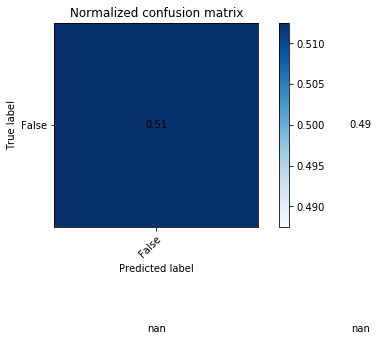

In [46]:
plot_confusion_matrix(y_test, y_pred_cs, classes=set(y_test), normalize=True)

Normalized confusion matrix
[[0.565 0.435]
 [  nan   nan]]


/home/nikta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


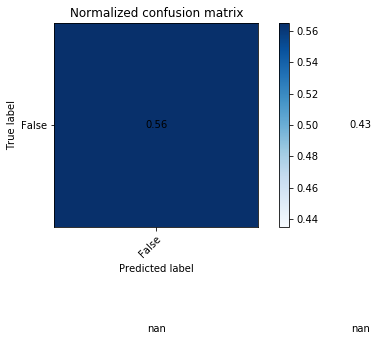

In [47]:
plot_confusion_matrix(y_test, y_pred_cs_chi2, classes=set(y_test), normalize=True)

Normalized confusion matrix
[[1.]]


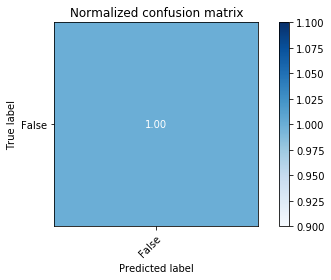

In [48]:
plot_confusion_matrix(y_test, y_pred_tfidf, classes=set(y_test), normalize=True)

In [49]:
confusion_matrix(y_test, y_pred_cs)

array([[205, 195],
       [  0,   0]])

In [50]:
confusion_matrix(y_test, y_pred_cs_chi2)

array([[226, 174],
       [  0,   0]])

In [51]:
confusion_matrix(y_test, y_pred_tfidf)

array([[400]])

Multinomial Naive Bayes:

In [52]:
class MultinomialNaiveBayes:
    
    def __init__(self):
        self.count = {}
        self.classes = None
    
    def fit(self,X_train,Y_train):    
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        Y_pred = [] 
        for i in range(len(X_test)):
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred


NB without chi2:

In [54]:
clf2 = MultinomialNaiveBayes()
clf2.fit(train_vector,y_train)
Y_pred_nb = clf2.predict(test_vector)

In [58]:
Y_pred_nb

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'spam',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'spam',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 '

NB with chi2:

In [56]:
clf2.fit(train_vector_chi2,y_train)
Y_pred_nb_chi2 = clf2.predict(test_vector_chi2)

In [59]:
Y_pred_nb_chi2

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'spam',
 'spam',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'spam',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'spam',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok'

In [60]:
#building x_test and y_test
x_concat_test = []
y_test = []
for emailok in f_ok_test:
    x_concat_test.append(emailok)
    y_test.append('ok')
    
for emailspam in f_spam_test:
    x_concat_test.append(emailspam)
    y_test.append('spam')

In [61]:
print("***reult of NB without chi2***")
evaluation(Y_pred_nb,y_test)
print("***reult of NB with chi2***")
evaluation(Y_pred_nb_chi2,y_test)

***reult of NB without chi2***
Accuracy: 0.95
precision: 0.9522158577027434
recall macro: 0.95
f1_macro: 0.949938674876724
recall micro: 0.95
f1_micro: 0.9500000000000001
***reult of NB with chi2***
Accuracy: 0.95
precision: 0.9511278195488723
recall macro: 0.95
f1_macro: 0.9499687304565354
recall micro: 0.95
f1_micro: 0.9500000000000001


Normalized confusion matrix
[[0.985 0.015]
 [0.085 0.915]]


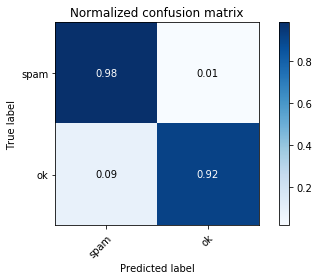

In [62]:
plot_confusion_matrix(y_test, Y_pred_nb, classes=set(y_test), normalize=True)

Normalized confusion matrix
[[0.975 0.025]
 [0.075 0.925]]


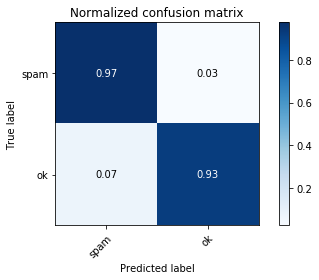

In [63]:
plot_confusion_matrix(y_test, Y_pred_nb_chi2, classes=set(y_test), normalize=True)

In [64]:
confusion_matrix(y_test, Y_pred_nb)

array([[197,   3],
       [ 17, 183]])

In [65]:
confusion_matrix(y_test, Y_pred_nb_chi2)

array([[195,   5],
       [ 15, 185]])

The results shows that NB works better than KNN in this problem. its hard to tell NB with CHi2 is better or without chi2 because in some metrics NB with chi2 is better and in others without chi2.